## Bibliotecas

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização de dados
import plotly.express as px
import kaleido

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

## Leitura das bases

In [2]:
# Mostrar mais colunas no display
pd.set_option('display.max_columns', None)

In [3]:
# Importa a base de dados em parquet
df = pd.read_parquet('Base_Consolidada.parquet')

## Estudo da base

Inicialmente, vamos verificar a estrutura de dados da nossa base. Para isso, começaremos analizando as 5 primeiras e as 5 últimas entradas, analisando as colunas disponíveis e observando a quantidade de nulos.

In [4]:
# Visualizar a base que importamos
display(df)

,Número do Auto,Data da Infração (DD/MM/AAAA),Indicador de Abordagem,Assinatura do Auto,Indicador Veiculo Estrangeiro,Sentido Trafego,UF Placa,UF Infração,BR Infração,Km Infração,Município,Código da Infração,Descrição Abreviada Infração,Enquadramento da Infração,Início Vigência da Infração,Fim Vigência Infração,Medição Infração,Descrição Especie Veículo,Descrição Marca Veículo,Hora Infração,Medição Considerada,Excesso Verificado,Qtd Infrações,Descrição Tipo Veículo,Descrição Modelo Veiculo
0,2b0d033ac754fc6,2020-01-16,S,N,N,C,'-1,RS,290,111,ELDORADO DO SUL,58350,Desobedecer às ordens emanadas da autorid comp...,195,2016-11-01,nan,Nenhuma,CARGA,VW,0,0,0,1,nan,nan
1,e1f8917e70ebf38,2020-01-18,S,N,N,C,'-1,RS,116,327,BARRA DO RIBEIRO,58350,Desobedecer às ordens emanadas da autorid comp...,195,2016-11-01,nan,Nenhuma,CARGA,OUTRA,0,0,0,1,nan,nan
2,dfd71eeac1fe06b,2020-01-25,C,N,N,D,RS,RS,116,292,ELDORADO DO SUL,65992,Conduzir o veículo registrado que não esteja d...,230 * V,2016-11-01,nan,Nenhuma,PASSAGEIRO,FORD,21,0,0,1,nan,nan
3,558685c5e4dbcca,2020-01-30,C,N,N,C,GO,MT,364,387,CUIABA,65991,Conduzir o veículo que não esteja registrado,230 * V,2016-11-01,nan,Nenhuma,TRAÇÃO,OUTRA,14,0,0,1,nan,nan
4,aac0a90d941bb4e,2020-01-31,C,N,N,C,RJ,RJ,101,65,CAMPOS DOS GOITACAZES,65992,Conduzir o veículo registrado que não esteja d...,230 * V,2016-11-01,nan,Nenhuma,PASSAGEIRO,OUTRA,15,0,0,1,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14559354,60b97427863ac79,2020-12-31,S,N,N,C,nan,SP,381,88,SAO PAULO,52070,Dirigir sem atenção ou sem os cuidados indispe...,169,2016-11-01,nan,Nenhuma,PASSAGEIRO,YAMAHA,16,0,0,1,nan,nan
14559355,6aaf2f7cd1925a5,2020-12-31,S,N,N,C,nan,SP,381,88,SAO PAULO,67690,Conduzir o veíc c/ com defeito no sist de ilum...,230 XXII,2016-11-01,nan,Nenhuma,PASSAGEIRO,FIAT,16,0,0,1,nan,nan
14559356,5f77ab593b62b93,2020-12-31,C,N,N,C,nan,MG,381,218,NAQUE,66450,Conduzir o veículo com equip obrigatório em de...,230 X,2016-11-01,nan,Nenhuma,CARGA,FORD,6,0,0,1,nan,nan
14559357,fe3d0ab71ecfba9,2020-12-31,C,N,N,C,nan,MG,381,218,NAQUE,66450,Conduzir o veículo com equip obrigatório em de...,230 X,2016-11-01,nan,Nenhuma,PASSAGEIRO,MERCEDES BENZ,6,0,0,1,nan,nan


In [5]:
# Exibe colunas disponíveis
df.columns

Index(['Número do Auto', 'Data da Infração (DD/MM/AAAA)',
       'Indicador de Abordagem', 'Assinatura do Auto',
       'Indicador Veiculo Estrangeiro', 'Sentido Trafego', 'UF Placa',
       'UF Infração', 'BR Infração', 'Km Infração', 'Município',
       'Código da Infração', 'Descrição Abreviada Infração',
       'Enquadramento da Infração', 'Início Vigência da Infração',
       'Fim Vigência Infração', 'Medição Infração',
       'Descrição Especie Veículo', 'Descrição Marca Veículo', 'Hora Infração',
       'Medição Considerada', 'Excesso Verificado', 'Qtd Infrações',
       'Descrição Tipo Veículo', 'Descrição Modelo Veiculo'],
      dtype='object')

In [6]:
# Verifica tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14559359 entries, 0 to 14559358
Data columns (total 25 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Número do Auto                 object
 1   Data da Infração (DD/MM/AAAA)  object
 2   Indicador de Abordagem         object
 3   Assinatura do Auto             object
 4   Indicador Veiculo Estrangeiro  object
 5   Sentido Trafego                object
 6   UF Placa                       object
 7   UF Infração                    object
 8   BR Infração                    object
 9   Km Infração                    object
 10  Município                      object
 11  Código da Infração             object
 12  Descrição Abreviada Infração   object
 13  Enquadramento da Infração      object
 14  Início Vigência da Infração    object
 15  Fim Vigência Infração          object
 16  Medição Infração               object
 17  Descrição Especie Veículo      object
 18  Descrição Marca Veíc

In [7]:
# Verifica a existência de valores nulos
df.isnull().sum()

Número do Auto                   0
Data da Infração (DD/MM/AAAA)    0
Indicador de Abordagem           0
Assinatura do Auto               0
Indicador Veiculo Estrangeiro    0
Sentido Trafego                  0
UF Placa                         0
UF Infração                      0
BR Infração                      0
Km Infração                      0
Município                        0
Código da Infração               0
Descrição Abreviada Infração     0
Enquadramento da Infração        0
Início Vigência da Infração      0
Fim Vigência Infração            0
Medição Infração                 0
Descrição Especie Veículo        0
Descrição Marca Veículo          0
Hora Infração                    0
Medição Considerada              0
Excesso Verificado               0
Qtd Infrações                    0
Descrição Tipo Veículo           0
Descrição Modelo Veiculo         0
dtype: int64

In [8]:
# Verifica a quantidade de valores únicos
df.nunique()

Número do Auto                   14559326
Data da Infração (DD/MM/AAAA)        1096
Indicador de Abordagem                  2
Assinatura do Auto                      2
Indicador Veiculo Estrangeiro           4
Sentido Trafego                         3
UF Placa                               91
UF Infração                            27
BR Infração                           132
Km Infração                          1261
Município                            2355
Código da Infração                    389
Descrição Abreviada Infração          398
Enquadramento da Infração             246
Início Vigência da Infração             9
Fim Vigência Infração                   2
Medição Infração                        5
Descrição Especie Veículo              14
Descrição Marca Veículo             20570
Hora Infração                          24
Medição Considerada                 21401
Excesso Verificado                  13985
Qtd Infrações                           2
Descrição Tipo Veículo            

**Observações iniciais:**

• Observamos aqui que a base possui 25 colunas e 14.559.359 linhas (que também representa a quantidade de infrações nesses três anos de análise).

• Ainda, vemos que todas as colunas estão definidas como "object", requerendo conversão de tipos.

• Sobre os valores nulos, observamos que todos estão com zero, mas isso provavelmente é uma interpretação incorreta, já que a base parece considerar o valor "nan" como string. Portanto, é importante tratar esses valores adequadamente, convertendo-os para o formato nulo (NaN) reconhecido pelo pandas.

• Também interessante de notar é que a coluna "Número do Auto", que representa uma espécie de identificador da infração, tem menos valores únicos que o total de linha. Isso sugere a possibilidade de existirem duplicatas ou repetições na coluna. É essencial investigar e tratar esses casos para garantir a integridade dos dados e a precisão das análises realizadas.


## Tratamento da base

In [9]:
# Converte "nan" que está como string, para valor nulo
df = df.replace('nan', np.nan)

In [10]:
# Verifica novamente a existência de valores nulos
df.isnull().sum()

Número do Auto                          0
Data da Infração (DD/MM/AAAA)           0
Indicador de Abordagem                  0
Assinatura do Auto                      0
Indicador Veiculo Estrangeiro         744
Sentido Trafego                         0
UF Placa                          9940077
UF Infração                             0
BR Infração                             0
Km Infração                             0
Município                               0
Código da Infração                      0
Descrição Abreviada Infração            0
Enquadramento da Infração               0
Início Vigência da Infração             0
Fim Vigência Infração            14559358
Medição Infração                        0
Descrição Especie Veículo             794
Descrição Marca Veículo              1792
Hora Infração                           0
Medição Considerada                     0
Excesso Verificado                      0
Qtd Infrações                           0
Descrição Tipo Veículo           1

In [11]:
# Excluir colunas com valores nulos: Indicador Veiculo Estrangeiro, UF Placa, Fim Vigência Infração, Descrição Especie Veículo, Descrição Marca Veículo, Descrição Tipo Veículo, Descrição Modelo Veiculo
df = df.dropna(axis='columns')

In [12]:
# Converte data para datetime
df['Data da Infração (DD/MM/AAAA)'] = pd.to_datetime( df['Data da Infração (DD/MM/AAAA)'])

In [13]:
# Verificar período da base
inicio = df['Data da Infração (DD/MM/AAAA)'].dt.date.min()
print(f'Data inicial: {inicio}')

fim = df['Data da Infração (DD/MM/AAAA)'].dt.date.max()
print(f'Data final: {fim}')

Data inicial: 2020-01-01
Data final: 2022-12-31


In [14]:
# Converte a coluna 'Hora Infação' para int
df['Hora Infração'] = df['Hora Infração'].astype(int)

# Define intervalos e rótulos
bins = [0, 6, 12, 18, 24.01]
labels = ['Entre 0 e 6 horas', 'Entre 6 e 12 horas', 'Entre 12 e 18 horas', 'Entre 18 e 24 horas']

# Cria categorização da coluna 'Hora Infração', que será utilizada posteriormente em análise
df['Hora Infração Categorizada'] = pd.cut(df['Hora Infração'], bins = bins, labels = labels, right = False)

In [15]:
# Extraindo mês e dia das datas
df['mes'] = pd.to_datetime( df['Data da Infração (DD/MM/AAAA)'] ).dt.month
df['ano'] = pd.to_datetime( df['Data da Infração (DD/MM/AAAA)'] ).dt.year


**Tratamentos iniciais realizados:**

• Exclusão de colunas com valores nulos: Foi realizada a exclusão das colunas que continham valores nulos, uma vez que esses valores podem levar a interpretações errôneas e não seriam necessárias para a análise inicial do conjunto de dados.

• Conversão da data para o formato datetime: A coluna contendo as datas das infrações foi convertida para o formato datetime, visando facilitar sua manipulação e possibilitar a extração de informações específicas, como o mês e o ano.

• Criação da coluna "Hora Infração Categorizada": Com base na coluna que armazena o horário das infrações, foi criada uma nova coluna denominada "Hora Infração Categorizada". Essa coluna agrupa os horários em intervalos específicos, permitindo uma análise mais simplificada dos dados relacionados aos diferentes períodos do dia.

• Criação das colunas "mês" e "ano": Com o intuito de possibilitar análises temporais mais detalhadas, foram criadas duas novas colunas, "mês" e "ano", que extraem as informações de mês e ano a partir da coluna de data das infrações. Essas colunas facilitam a realização de agrupamentos e comparações ao longo do tempo.


## Análises

#### Como as infrações variam por ano?

In [16]:
df_ano = df.groupby('ano').agg(Conta_Autos = ('Número do Auto', 'count')).reset_index()
df_ano['Variação Percentual'] = df_ano['Conta_Autos'].pct_change() * 100
df_ano['Variação Percentual'] = df_ano['Variação Percentual'].round(2)

display(df_ano)

,ano,Conta_Autos,Variação Percentual
0,2020,5182537,NaN
1,2021,5241299,1.13
2,2022,4135523,-21.10


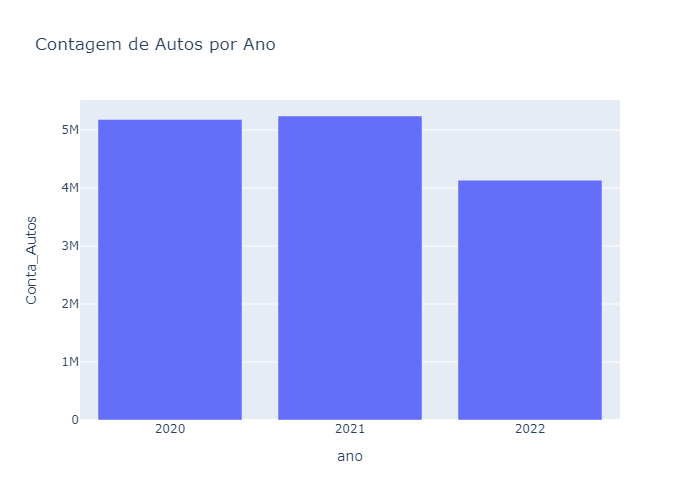

In [29]:
# Gráfico de barras do df_ano

plot_ano = px.bar(
    df_ano,
    x = 'ano',
    y = 'Conta_Autos',
    title = 'Contagem de Autos por Ano'
)

plot_ano.update_layout(xaxis = {'dtick' : 1})

plot_ano.show('png')

#### Como as infrações variam por mês?

In [23]:
df_mes = df.groupby('mes').agg(Conta_Autos = ('Número do Auto', 'count')).reset_index()
df_mes = df_mes.sort_values('Conta_Autos', ascending = False)

display(df_mes)

,mes,Conta_Autos
1,2,1327215
9,10,1303301
11,12,1275938
0,1,1263155
7,8,1257932
8,9,1257497
6,7,1180487
5,6,1178581
2,3,1170239
4,5,1161589


In [24]:
# Gráfico de barras do df_mes

plot_mes = px.bar(
    df_mes,
    x = 'mes',
    y = 'Conta_Autos',
    title = 'Contagem de Autos por Mês no período de 2020-2022'
)

plot_mes.update_layout(
    xaxis = {'dtick' : 1},
    title_x = 0.5
    )

plot_mes.show('png')

#### Quais os tipos de infrações mais comuns?

In [25]:
df_infracoes = df['Descrição Abreviada Infração'].value_counts().reset_index()
df_infracoes.columns = ['Descrição Abreviada Infração', 'Contagem Infracoes']
df_infracoes = df_infracoes.sort_values('Contagem Infracoes', ascending=False)
df_infracoes = df_infracoes.nlargest(5, 'Contagem Infracoes')

display(df_infracoes)

,Descrição Abreviada Infração,Contagem Infracoes
0,Transitar em velocidade superior à máxima perm...,5407392
1,Transitar em velocidade superior à máxima perm...,817103
2,Ultrapassar pela contramão linha de divisão de...,692306
3,Deixar o condutor de usar o cinto segurança,497094
4,Conduzir o veículo registrado que não esteja d...,493663


In [26]:
# Gráfico de barras do df_infracoes

plot_infracoes = px.bar(
    df_infracoes,
    x = 'Descrição Abreviada Infração',
    y = 'Contagem Infracoes',
    title = 'Infrações Mais Frequentes por Descrição'
)

plot_infracoes.update_layout(
    xaxis_tickangle = 15,
    title_x = 0.5
    )

plot_infracoes.show('png')

#### Quais os estados com maior ocorrência de infração?

In [27]:
df_estados = df['UF Infração'].value_counts().reset_index()
df_estados.columns = ['UF Infração', 'Contagem Infracoes']
df_estados = df_estados.sort_values('Contagem Infracoes', ascending=False)
df_estados = df_estados.nlargest(5, 'Contagem Infracoes')

display(df_estados)

,UF Infração,Contagem Infracoes
0,RJ,2263220
1,MG,1799596
2,SP,1554159
3,BA,1282636
4,MS,1008968


In [28]:
# Gráfico de barras do df_estados

plot_estados = px.bar(
    df_estados,
    x = 'UF Infração',
    y = 'Contagem Infracoes',
    title = 'Infrações Mais Frequentes por Estado'
)

plot_estados.update_layout(
    title_x = 0.5
    )

plot_estados.show('png')

**Conclusões:**

• Variação na Quantidade de Infrações: Observamos uma variação significativa na quantidade de infrações ao longo dos anos analisados. Em 2020, foram registradas 5.182.537 infrações, aumentando para 5.241.299 em 2021, representando um acréscimo de 1,13%. Entretanto, em 2022, houve uma queda acentuada, chegando a 4.135.523 infrações, uma redução de 21,10% em relação ao ano anterior — o que faz sentido, já que no contexto de pandemia, menos pessoas saíam de casa.

• Distribuição Mensal das Infrações: A análise mensal demonstrou que o mês de fevereiro teve o maior número de infrações, totalizando 1.327.215 registros, seguido pelos meses de outubro e dezembro, com 1.303.301 e 1.275.938 infrações, respectivamente. Já o mês de abril apresentou a menor quantidade de infrações, com 1.085.114 registros.

• Infrações Mais Frequentes: As cinco infrações mais comuns foram: Transitar em velocidade superior à máxima permitida em até 20%  (5.407.392 registros); Transitar em velocidade superior à máxima permitida em mais de 20% até 50% (817.103 registros); Ultrapassar pela contramão linha de divisão de fluxos opostos, contínua amarela (692.306 registros); Deixar o condutor de usar o cinto segurança (497.094 registros); e Conduzir o veículo registrado que não esteja devidamente licenciado (493.663 registros).

• Estados com Maior Ocorrência de Infração: Os estados com maior número de infrações foram Rio de Janeiro (2.263.220 registros), Minas Gerais (1.799.596 registros), São Paulo (1.554.159 registros), Bahia (1.282.636 registros) e Mato Grosso do Sul (1.008.968 registros).

Essas conclusões fornecem insights importantes para a Polícia Rodoviária Federal e demais órgãos responsáveis pelo trânsito, permitindo a identificação de áreas com maior incidência de infrações e a implementação de medidas para promover a segurança viária. Além disso, as informações obtidas podem auxiliar na elaboração de políticas públicas e campanhas de conscientização com foco nas infrações mais frequentes e nos horários de maior incidência.

É fundamental ressaltar que a análise exploratória é apenas o primeiro passo no processo de exploração dos dados e que análises mais aprofundadas e complexas podem ser realizadas com o intuito de obter um entendimento mais completo do cenário de infrações no Brasil. As informações aqui apresentadas devem ser utilizadas como base para novos estudos e aprimoramentos nas ações de fiscalização e conscientização no trânsito, visando contribuir para a construção de um tráfego mais seguro e consciente em nossas estradas.